### Setup 

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Statistical Tests
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import norm

np.set_printoptions(suppress=True)


# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime

pd.options.display.float_format = '{:20,.2f}'.format



In [2]:
import env

import wrangle

from wrangle import clean_zillow, missing_zero_values_table, features_missing, handle_missing_values, get_zillow_data, split, seperate_y, scale_data, split_seperate_scale 

import explore

### Acquisition 

In [3]:
df = pd.read_csv('zillowcluster_df.csv') 

## data was previously cached as csv from SQL

In [6]:
df['has_amenities'] = np.where((df['fireplaceflag']==1) | (df['poolcnt']==1), 1, 0)

## a new feature that was created after we had already begun cluster modeling 

In [7]:
clean_df = clean_zillow(df)

## prepare the data using wrangle functions

In [10]:
train, validate, test = split(clean_df)

## split the data so we can later test the model

In [17]:
X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

## seperate the target variable for regression modeling 

In [18]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

## scale data for modeling purposes

# Modeling

In [23]:
X = train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

## these features were chosen for modeling as they performed best on our modeling exploration

In [24]:
X_validate = validate_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [25]:
X_test = test_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

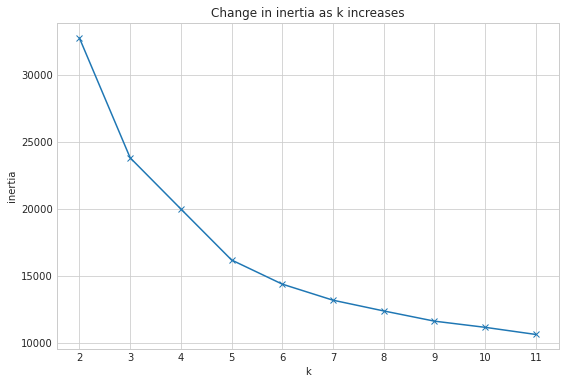

In [28]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [29]:
## it looks like the most appropriate k would be 5

In [30]:
kmeans = KMeans(n_clusters=5)
## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)
## fit the model to the fields you want to use in your model

kmeans.predict(X)
kmeans.predict(X_validate)
kmeans.predict(X_test)
## make your predictions

train_scaled['cluster'] = kmeans.predict(X)
validate_scaled['cluster'] = kmeans.predict(X_validate)
test_scaled['cluster'] = kmeans.predict(X_test)
## store the predictions as a column on your df

train['cluster'] = kmeans.predict(X)
validate['cluster'] = kmeans.predict(X_validate)
test['cluster'] = kmeans.predict(X_test)
## store the predictions as a column on your df

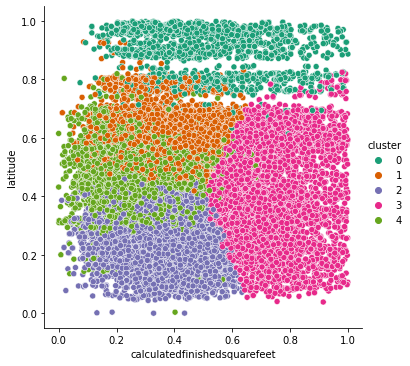

In [35]:
sns.relplot(data=train_scaled, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

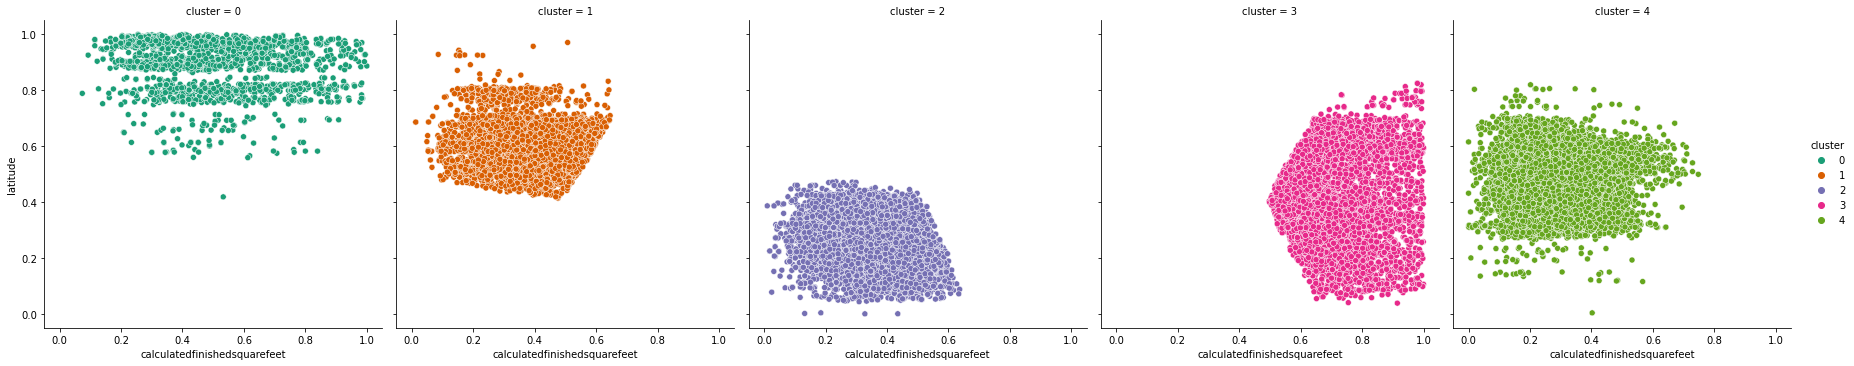

In [38]:
sns.relplot(data=train_scaled, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', col = 'cluster', palette= 'Dark2')

(-0.3, 0.3)

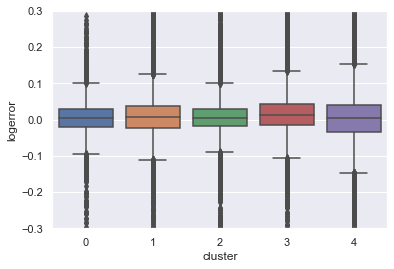

In [164]:
sns.boxplot(y=train.logerror, x=train.cluster)
plt.ylim(-.3, .3)

In [40]:
## save clusters to csv to be explored

In [41]:
model1 = train

In [42]:
model1.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,roomcnt,...,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,bath_amenity_house,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
17300850,1.00,5.00,3.50,4.00,"3,080.00",6111,34.20,-118.68,"21,785.00",7.00,...,1.19,0.50,0.30,0.70,0.88,0,0,0,1,3
13993394,1.00,5.00,1.00,5.00,"1,448.00",6059,33.83,-117.95,"22,000.00",8.00,...,1.19,0.51,0.40,0.30,0.20,0,0,1,0,4
12496234,2.00,1.00,2.00,3.00,"1,361.00",6037,33.81,-118.12,"4,956.00",0.00,...,1.20,0.11,0.10,0.30,0.67,0,1,0,0,4
10818923,7.00,5.00,1.00,3.00,"1,180.00",6037,34.22,-118.51,"6,056.00",0.00,...,1.20,0.14,0.10,0.20,0.33,0,1,0,0,4
11462743,2.00,1.00,3.00,3.00,"2,544.00",6037,33.96,-118.43,"4,903.00",0.00,...,1.25,0.11,0.10,0.60,1.00,0,1,0,0,3


In [43]:
model1['cluster'] = kmeans.predict(X)

In [44]:
model1.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,roomcnt,...,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,bath_amenity_house,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
17300850,1.00,5.00,3.50,4.00,"3,080.00",6111,34.20,-118.68,"21,785.00",7.00,...,1.19,0.50,0.30,0.70,0.88,0,0,0,1,3
13993394,1.00,5.00,1.00,5.00,"1,448.00",6059,33.83,-117.95,"22,000.00",8.00,...,1.19,0.51,0.40,0.30,0.20,0,0,1,0,4
12496234,2.00,1.00,2.00,3.00,"1,361.00",6037,33.81,-118.12,"4,956.00",0.00,...,1.20,0.11,0.10,0.30,0.67,0,1,0,0,4
10818923,7.00,5.00,1.00,3.00,"1,180.00",6037,34.22,-118.51,"6,056.00",0.00,...,1.20,0.14,0.10,0.20,0.33,0,1,0,0,4
11462743,2.00,1.00,3.00,3.00,"2,544.00",6037,33.96,-118.43,"4,903.00",0.00,...,1.25,0.11,0.10,0.60,1.00,0,1,0,0,3


In [45]:
model1.groupby('fips').cluster.value_counts()

fips  cluster
6037  4          9092
      1          5074
      3          2844
      0          2120
      2          1190
6059  2          6751
      3          2514
      4          1283
      1            14
      0             1
6111  1          2308
      3           550
      4           136
      0            89
Name: cluster, dtype: int64

In [46]:
model1.to_csv('model1.csv')

## Statistical Testing

In [47]:
from math import sqrt

#### Cluster 0

In [48]:
H0 = 'There is no difference in the logerror between Cluster 0 and the general population'

H1 = 'There is a difference in the logerror between Cluster 0 and the general population'

alpha = .05

In [49]:
cluster0 = train[train.cluster == 0]

μ = train.logerror.mean()
xbar = cluster0.logerror.mean()
s = cluster0.logerror.std()
n = cluster0.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-1.2101281985822652, 1.7736408215078925)

In [50]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


#### Cluster 1

In [51]:
H0 = 'There is no difference in the logerror between Cluster 1 and the general population'

H1 = 'There is a difference in the logerror between Cluster 1 and the general population'

alpha = .05

In [52]:
cluster1 = train[train.cluster == 1]

μ = train.logerror.mean()
xbar = cluster1.logerror.mean()
s = cluster1.logerror.std()
n = cluster1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-0.886169785611673, 1.6244451417066443)

In [53]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


#### Cluster 2

In [54]:
H0 = 'There is no difference in the logerror between Cluster 2 and the general population'

H1 = 'There is a difference in the logerror between Cluster 2 and the general population'

alpha = .05

In [55]:
cluster2 = train[train.cluster == 2]

μ = train.logerror.mean()
xbar = cluster2.logerror.mean()
s = cluster2.logerror.std()
n = cluster2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-1.0568974963375202, 1.7094094740120718)

In [56]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


#### Cluster 3

In [57]:
H0 = 'There is no difference in the logerror between Cluster 3 and the general population'

H1 = 'There is a difference in the logerror between Cluster 3 and the general population'

alpha = .05

In [58]:
cluster3 = train[train.cluster == 3]

μ = train.logerror.mean()
xbar = cluster3.logerror.mean()
s = cluster3.logerror.std()
n = cluster3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(4.31382338836291, 1.6307061077156186e-05)

In [59]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

There is a difference in the logerror between Cluster 3 and the general population


In [60]:
train.shape

(33966, 31)

In [61]:
cluster3.shape

(5908, 31)

In [62]:
## We can conclude there is a difference in logerror rates between cluster 3 and the general population

## homes that are in the larger half, regardless of age or tax rate, in the middle to southern half of area surveyed 

## Cluster 3 appears to account for approx 17% of the data in train

#### Cluster 4

In [63]:
H0 = 'There is no difference in the logerror between Cluster 4 and the general population'

H1 = 'There is a difference in the logerror between Cluster 4 and the general population'

alpha = .05

In [64]:
cluster4 = train[train.cluster == 4]

μ = train.logerror.mean()
xbar = cluster4.logerror.mean()
s = cluster4.logerror.std()
n = cluster4.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-1.644563776290028, 1.8999102910704693)

In [65]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [66]:
## Only cluster 3 has a significant difference in logerror rates, it should be made into a variable for regression

# Regression Modeling

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


In [68]:
## make features out of our clusters 

In [69]:
dummy_df = pd.get_dummies(train['cluster'])

dummy_df.columns = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']

In [70]:
train = pd.concat([train, dummy_df], axis=1)

In [72]:
dummy_df = pd.get_dummies(validate['cluster'])

dummy_df.columns = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']

validate = pd.concat([validate, dummy_df], axis=1)

In [74]:
dummy_df = pd.get_dummies(test['cluster'])

dummy_df.columns = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']

test = pd.concat([test, dummy_df], axis=1)

In [77]:
## Seperate Target Variable

X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [79]:
## Scaled Data

train_scaled, validate_scaled, test_scaled = scale_data(X_train, X_validate, X_test)

### Establish Baseline

In [84]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [85]:
# 1. Predict logerror_mean
logerror_mean = y_train['logerror'].mean()
y_train['logerror_mean'] = logerror_mean
y_validate['logerror_mean'] = logerror_mean

In [87]:
# 2. compute logerror_median
logerror_median = y_train['logerror'].median()
y_train['logerror_median'] = logerror_median
y_validate['logerror_median'] = logerror_median

In [90]:
# 3. RMSE of logerror_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_mean)**(1/2)

In [91]:
print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

RMSE using Mean
Train/In-Sample:  0.1598879174174766 
Validate/Out-of-Sample:  0.16005107668563168


In [92]:
# 4. RMSE of logerror_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_median)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

RMSE using Mean
Train/In-Sample:  0.16013310952440438 
Validate/Out-of-Sample:  0.1604117448479204


## LinearRegression (OLS)

In [93]:
features = ['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate', 'cluster3']

## features were chosen as they are the ones used in clustering and including the cluster that had a significant difference in logerror

In [94]:
# create the model object
lm = LinearRegression(normalize=True)

In [95]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(train_scaled[features], y_train.logerror)

LinearRegression(normalize=True)

In [96]:
# predict train
y_train['logerror_pred_lm'] = lm.predict(train_scaled[features])

y_train.head()

,logerror,logerror_mean,logerror_median,logerror_pred_lm
parcelid,,,,
17300850,0.06,0.01,0.01,0.02
13993394,-0.13,0.01,0.01,0.02
12496234,0.03,0.01,0.01,0.01
10818923,-0.00,0.01,0.01,0.01
11462743,-0.02,0.01,0.01,0.02


In [97]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(1/2)

rmse_train

0.15977825332346482

In [98]:
# predict validate
y_validate['logerror_pred_lm'] = lm.predict(validate_scaled[features])

y_validate.head()

,logerror,logerror_mean,logerror_median,logerror_pred_lm
parcelid,,,,
10766026,0.06,0.01,0.01,0.01
13942624,0.03,0.01,0.01,0.02
14735779,0.00,0.01,0.01,0.01
11452608,-0.05,0.01,0.01,0.01
12162450,0.05,0.01,0.01,0.01


In [99]:
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(1/2)

rmse_validate

0.1599023137366097

In [100]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.15977825332346482 
Validation/Out-of-Sample:  0.1599023137366097


In [101]:
## This model does slightly better than the baseline, if only marginally

## LassoLars

In [102]:
# create the model object
lars = LassoLars(alpha=1.0)

In [103]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(train_scaled[features], y_train.logerror)

LassoLars()

In [104]:
# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train[features])

In [105]:
y_train.head()

,logerror,logerror_mean,logerror_median,logerror_pred_lm,logerror_pred_lars
parcelid,,,,,
17300850,0.06,0.01,0.01,0.02,0.01
13993394,-0.13,0.01,0.01,0.02,0.01
12496234,0.03,0.01,0.01,0.01,0.01
10818923,-0.00,0.01,0.01,0.01,0.01
11462743,-0.02,0.01,0.01,0.02,0.01


In [106]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(1/2)

rmse_train

0.15988791741747663

In [107]:
# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate[features])

In [108]:
y_validate.head()

,logerror,logerror_mean,logerror_median,logerror_pred_lm,logerror_pred_lars
parcelid,,,,,
10766026,0.06,0.01,0.01,0.01,0.01
13942624,0.03,0.01,0.01,0.02,0.01
14735779,0.00,0.01,0.01,0.01,0.01
11452608,-0.05,0.01,0.01,0.01,0.01
12162450,0.05,0.01,0.01,0.01,0.01


In [109]:
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(1/2)

rmse_validate

0.16005107668563168

In [110]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.15988791741747663 
Validation/Out-of-Sample:  0.16005107668563168


## TweedieRegressor (GLM)

<AxesSubplot:>

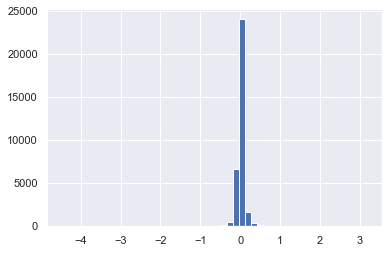

In [165]:
y_train.logerror.hist(bins = 50)

## Data is distributed normally

In [112]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)

In [113]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(train_scaled[features], y_train.logerror)

TweedieRegressor(alpha=0, power=0)

In [114]:
# predict train
y_train['logerror_pred_glm'] = glm.predict(train_scaled[features])

In [115]:
y_train.head()

,logerror,logerror_mean,logerror_median,logerror_pred_lm,logerror_pred_lars,logerror_pred_glm
parcelid,,,,,,
17300850,0.06,0.01,0.01,0.02,0.01,0.02
13993394,-0.13,0.01,0.01,0.02,0.01,0.02
12496234,0.03,0.01,0.01,0.01,0.01,0.01
10818923,-0.00,0.01,0.01,0.01,0.01,0.01
11462743,-0.02,0.01,0.01,0.02,0.01,0.02


In [116]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_glm)**(1/2)

rmse_train

0.15977836378659674

In [117]:
# predict validate
y_validate['logerror_pred_glm'] = glm.predict(validate_scaled[features])

In [118]:
y_validate.head()

,logerror,logerror_mean,logerror_median,logerror_pred_lm,logerror_pred_lars,logerror_pred_glm
parcelid,,,,,,
10766026,0.06,0.01,0.01,0.01,0.01,0.01
13942624,0.03,0.01,0.01,0.02,0.01,0.02
14735779,0.00,0.01,0.01,0.01,0.01,0.01
11452608,-0.05,0.01,0.01,0.01,0.01,0.01
12162450,0.05,0.01,0.01,0.01,0.01,0.01


In [119]:
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_glm)**(1/2)

rmse_validate

0.15990228283901656

In [120]:
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.15977836378659674 
Validation/Out-of-Sample:  0.15990228283901656


In [121]:
## this model performed similarly to the OLS model

## Polynomial Regression

#### PolynomialFeatures

In [122]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

In [123]:
# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(train_scaled[features])

In [124]:
# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(validate_scaled[features])
X_test_degree2 = pf.transform(test_scaled[features])

#### LinearRegression

In [125]:
# create the model object
lm2 = LinearRegression(normalize=True)

In [126]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)

LinearRegression(normalize=True)

In [127]:
# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree2)

In [128]:
y_train.head()

,logerror,logerror_mean,logerror_median,logerror_pred_lm,logerror_pred_lars,logerror_pred_glm,logerror_pred_lm2
parcelid,,,,,,,
17300850,0.06,0.01,0.01,0.02,0.01,0.02,0.02
13993394,-0.13,0.01,0.01,0.02,0.01,0.02,0.01
12496234,0.03,0.01,0.01,0.01,0.01,0.01,0.01
10818923,-0.00,0.01,0.01,0.01,0.01,0.01,0.01
11462743,-0.02,0.01,0.01,0.02,0.01,0.02,0.02


In [129]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2)**(1/2)

rmse_train

0.1597010966423107

In [130]:
# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)

In [131]:
y_validate.head()

,logerror,logerror_mean,logerror_median,logerror_pred_lm,logerror_pred_lars,logerror_pred_glm,logerror_pred_lm2
parcelid,,,,,,,
10766026,0.06,0.01,0.01,0.01,0.01,0.01,0.01
13942624,0.03,0.01,0.01,0.02,0.01,0.02,0.03
14735779,0.00,0.01,0.01,0.01,0.01,0.01,0.01
11452608,-0.05,0.01,0.01,0.01,0.01,0.01,0.01
12162450,0.05,0.01,0.01,0.01,0.01,0.01,0.00


In [132]:
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2)**(1/2)

rmse_validate

0.15987618724583302

In [133]:
print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.1597010966423107 
Validation/Out-of-Sample:  0.15987618724583302


In [134]:
## This model does marginally better than the baseline and OLS, but it does appear to do the best on unseen data

## Evaluate

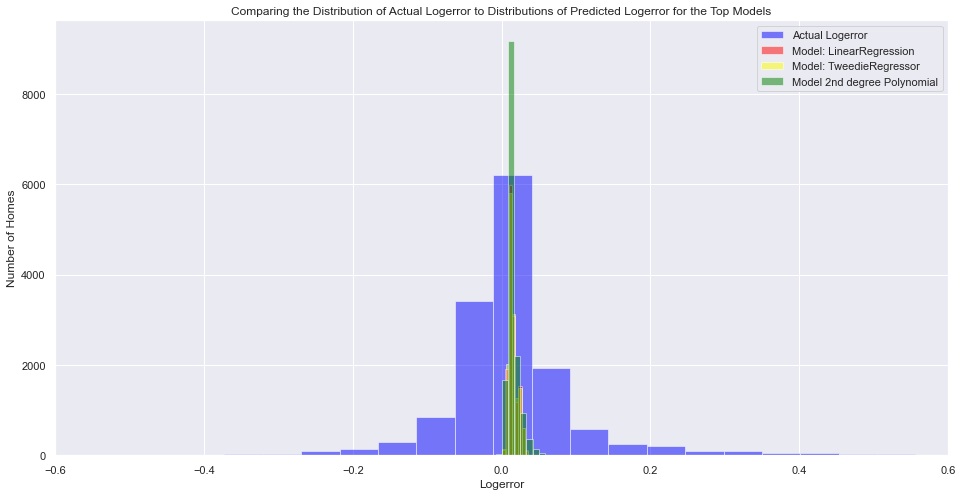

In [171]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.logerror, color='blue', alpha=.5, label="Actual Logerror", bins = 150)
plt.hist(y_validate.logerror_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.logerror_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.logerror_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Logerror")
plt.ylabel("Number of Homes")
plt.title("Comparing the Distribution of Actual Logerror to Distributions of Predicted Logerror for the Top Models")
plt.legend()
plt.xlim(-.6, .6)
plt.show()

In [172]:
## Our final model seems to have predicted all values within a very small range

## this may be due to outliers 

Text(0.5, 1.0, 'Model: Polynomial Regresser')

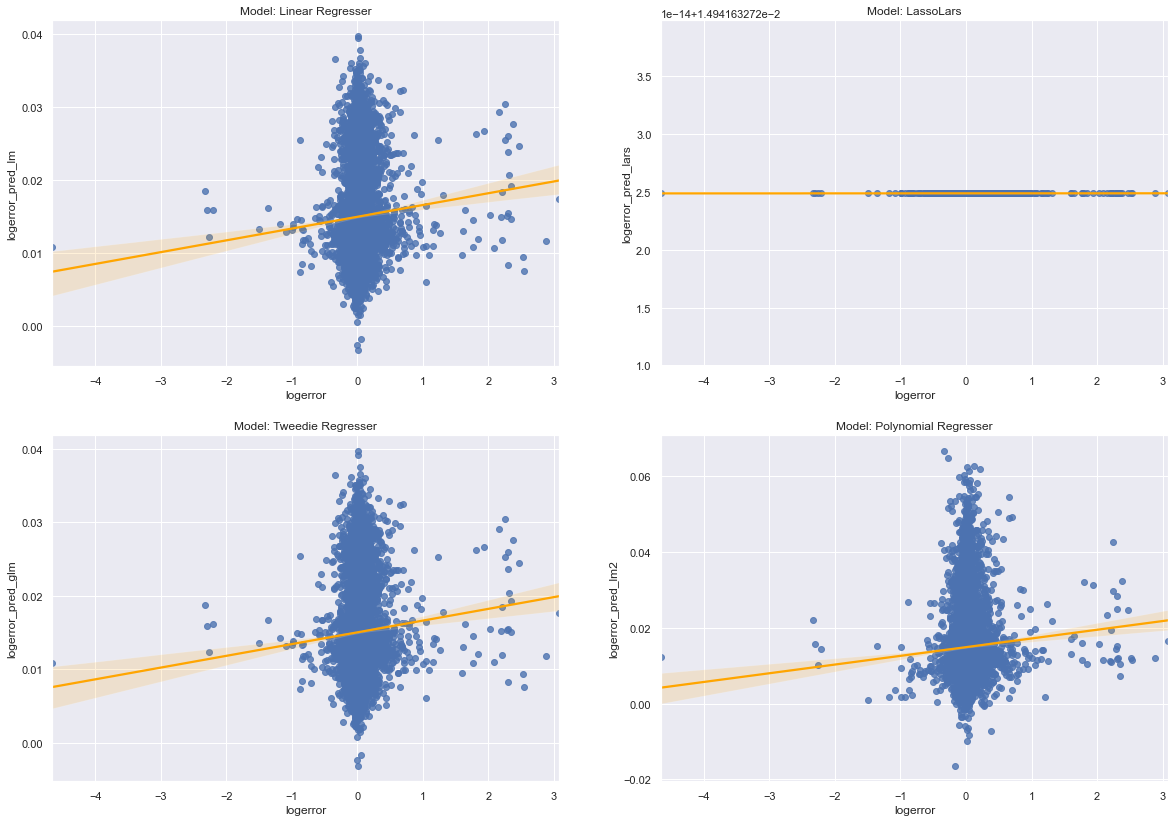

In [143]:
plt.subplots(2, 2, figsize=(20, 14), sharey=True)
sns.set(style="darkgrid")
plt.subplot(2,2,1)
sns.regplot(x= y_validate.logerror, y= y_validate.logerror_pred_lm, line_kws={"color": "orange"})
plt.title("Model: Linear Regresser")
plt.subplot(2,2,2)
sns.regplot(x= y_validate.logerror, y= y_validate.logerror_pred_lars, line_kws={"color": "orange"})
plt.title("Model: LassoLars")
plt.subplot(2,2,3)
sns.regplot(x= y_validate.logerror, y= y_validate.logerror_pred_glm, line_kws={"color": "orange"})
plt.title("Model: Tweedie Regresser")
plt.subplot(2,2,4)
sns.regplot(x= y_validate.logerror, y= y_validate.logerror_pred_lm2, line_kws={"color": "orange"}) 
plt.title("Model: Polynomial Regresser")

In [173]:
## LassoLars seems to have just predicted the mean

## the other models all look similar

## most actual values centered around 0
### widest range of predicted values also near 0

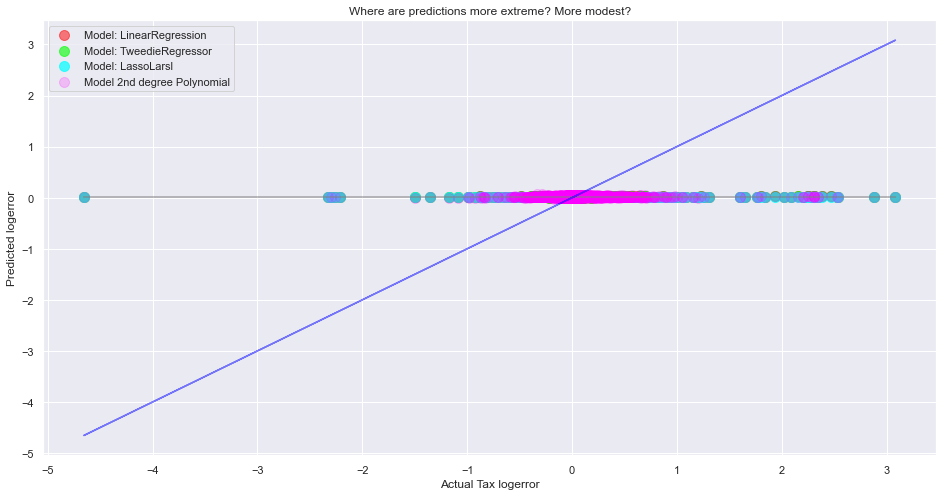

In [145]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.logerror, y_validate.logerror_mean, alpha=.5, color="gray", label='_nolegend_')

plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="blue", label='_nolegend_')

plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.logerror, y_validate.logerror_pred_glm, 
            alpha=.6, color="lime", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lars, 
            alpha=.7, color="cyan", s=100, label="Model: LassoLarsl")
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm2, 
            alpha=.2, color="magenta", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax logerror")
plt.ylabel("Predicted logerror")
plt.title("Where are predictions more extreme? More modest?")

plt.show()

In [ ]:
## Most models seemed tp have predictions closer to the mean than y = x

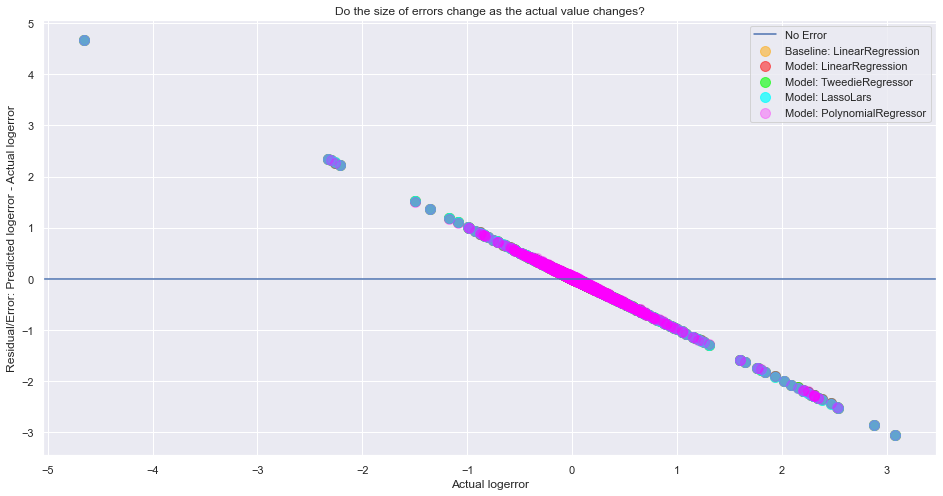

In [147]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")

plt.scatter(y_validate.logerror, y_validate.logerror_mean - y_validate.logerror , 
            alpha=.5, color="orange", s=100, label="Baseline: LinearRegression")
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm - y_validate.logerror , 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.logerror, y_validate.logerror_pred_glm - y_validate.logerror, 
            alpha=.6, color="lime", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lars - y_validate.logerror , 
            alpha=.7, color="cyan", s=100, label="Model: LassoLars")
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm2 - y_validate.logerror , 
            alpha=.3, color="magenta", s=100, label="Model: PolynomialRegressor")
plt.legend()
plt.xlabel("Actual logerror")
plt.ylabel("Residual/Error: Predicted logerror - Actual logerror")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

In [174]:
## the lower the actual logerror, the more our model prediected it was higher than it actually was

## the higher the actual logerror, the more our model predicted it was lower than it actually was 

## the only play our model's prediction seems to be correct is where the actual logerror was 0 or close to 0

In [148]:


# predict on test
y_test['logerror_pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.logerror, y_test.logerror_pred_lm2)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  0.1527358457146303


In [ ]:
## Our model has performed better on unseen test data than our baseline!

### R^2

In [150]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [152]:
r2_score(y_train.logerror, y_train.logerror_pred_lm2)

0.002335531451874151

In [154]:
r2_score(y_validate.logerror, y_validate.logerror_pred_lm2)

0.002013248180403382

In [155]:
r2_score(y_test.logerror, y_test.logerror_pred_lm2)

0.0005946238933035586

In [175]:
## our model does not appear to explain very much variance at all

## once again likely due to outliers 